<a href="https://colab.research.google.com/github/HenryZumaeta/MASTER/blob/Zeta/STAT/SegundoTrabajoPractico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

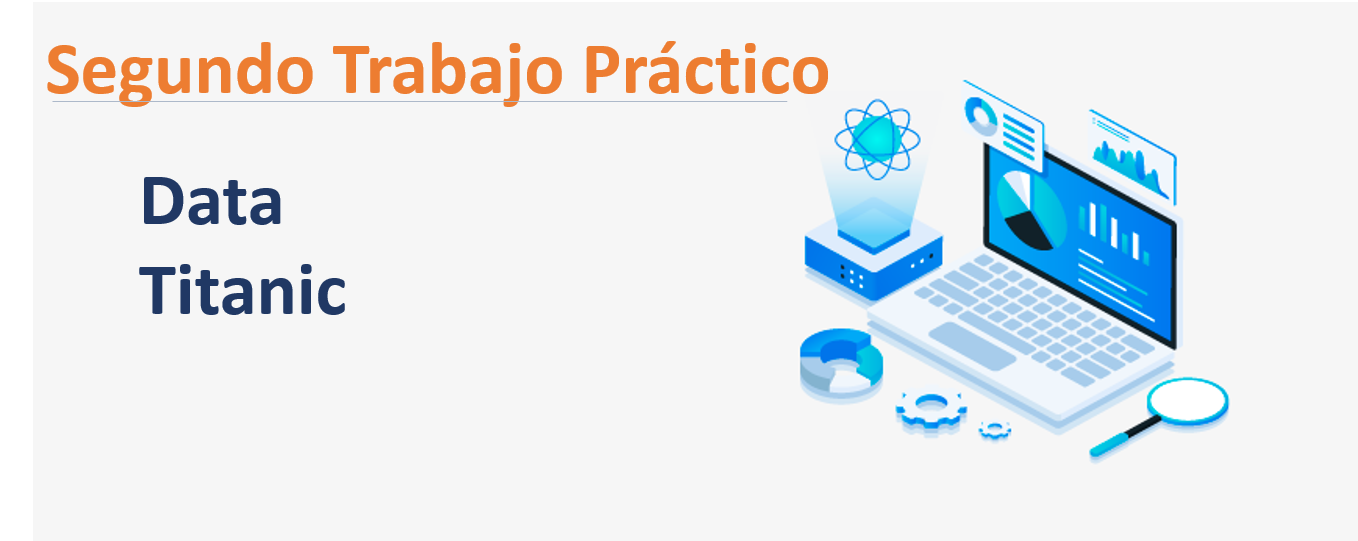

**CONTEXTO**

"El hundimiento del Titanic es uno de los naufragios más infames de la historia.

El 15 de abril de 1912, durante su viaje inaugural, el ampliamente considerado "inaundable" RMS Titanic se hundió después de chocar con un iceberg. Desafortunadamente, no había suficientes botes salvavidas para todos a bordo, lo que resultó en la muerte de 1502 de los 2224 pasajeros y tripulantes.

Si bien hubo cierto elemento de suerte involucrado en sobrevivir, parece que algunos grupos de personas tenían más probabilidades de sobrevivir que otros."

**OBJETIVOS:**

Usar los conceptos de probabilidad y análisis exploratorio:

Tener un perfil de los sobrevivientes
Identificar si existían variables que aumentaban la probabilidad de sobrevivir

**MATERIALES DE TRABAJO**

Para el desarrollo del trabajo se tiene:

train.csv: Es la base de datos a trabajar
Diccionario.pdf:Contiene el diccionario de las variables


Se deberá trabajar en este cuaderno de trabajo todo el análisis desarrollado, explicando paso a paso la lógica usada y sus conclusiones finales (debe espicificar si se usa R o Python).

# LIBRERÍAS

In [ ]:
# @title Instalando R en Colab
# Instalando R en Colab
!apt-get install r-base

# Integracion entre R y Python
!pip install rpy2

# Usar R en Colab
%load_ext rpy2.ipython

## Instalación de librerías de R

In [ ]:
# Instalando paquetes de R a usar
%%R
install.packages("readr")
install.packages("DataExplorer")

## Cargando librerías de Python

In [ ]:
# Cargamos las librerías:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import trim_mean

# CARGA DE LA DATA

In [ ]:
link = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQe_GAGQnrbGKDcCD37EefPBarR0DnbRnV8Ec2Bfo03FhfwkGp1TB_KXVCnQnu4ng/pub?gid=1021815056&single=true&output=csv"
df = pd.read_csv(link)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2.0,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3.0,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.93,NaN,S
3,4.0,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5.0,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [ ]:
%%R -i link
library(readr)

dataR <-read_csv(link, show_col_types = FALSE)
dataR

# A tibble: 891 × 12
   PassengerId Survived Pclass Name   Sex     Age SibSp Parch Ticket  Fare Cabin
         <dbl>    <dbl>  <dbl> <chr>  <chr> <dbl> <dbl> <dbl> <chr>  <dbl> <chr>
 1           1        0      3 Braun… male     22     1     0 A/5 2…  7.25 <NA> 
 2           2        1      1 Cumin… fema…    38     1     0 PC 17… 71.3  C85  
 3           3        1      3 Heikk… fema…    26     0     0 STON/…  7.93 <NA> 
 4           4        1      1 Futre… fema…    35     1     0 113803 53.1  C123 
 5           5        0      3 Allen… male     35     0     0 373450  8.05 <NA> 
 6           6        0      3 Moran… male     NA     0     0 330877  8.46 <NA> 
 7           7        0      1 McCar… male     54     0     0 17463  51.9  E46  
 8           8        0      3 Palss… male      2     3     1 349909 21.1  <NA> 
 9           9        1      3 Johns… fema…    27     0     2 347742 11.1  <NA> 
10          10        1      2 Nasse… fema…    14     1     0 237736 30.1  <NA> 
# ℹ 881

# EDA

## Visualización general de la data

In [ ]:
%%R
library(DataExplorer)

# Resumen de la data
introduce(dataR)

# A tibble: 1 × 9
   rows columns discrete_columns continuous_columns all_missing_columns
  <int>   <int>            <int>              <int>               <int>
1   891      12                5                  7                   0
# ℹ 4 more variables: total_missing_values <int>, complete_rows <int>,
#   total_observations <int>, memory_usage <dbl>


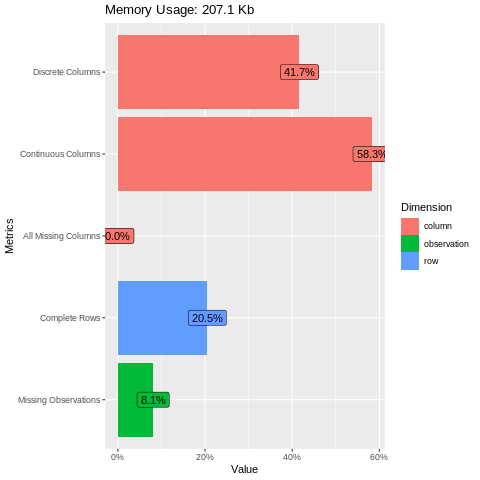

In [ ]:
%%R
library(DataExplorer)

# Resumen de la data
plot_intro(dataR)

El gráfico de barras representa las diferentes métricas:

**Discrete Columns:** El 41.7% de las columnas en el conjunto de datos son
discretas.

**Continuous Columns:** El 58.3% de las columnas en el conjunto de datos son continuas.

**All Missing Columns:** No hay columnas (0.0%) en el conjunto de datos que tengan todos sus valores faltantes.

**Complete Rows:** El 20.5% de las filas en el conjunto de datos están completas, es decir, no tienen ningún valor faltante.

**Missing Observations:** El 8.1% de las observaciones en el conjunto de datos están faltantes

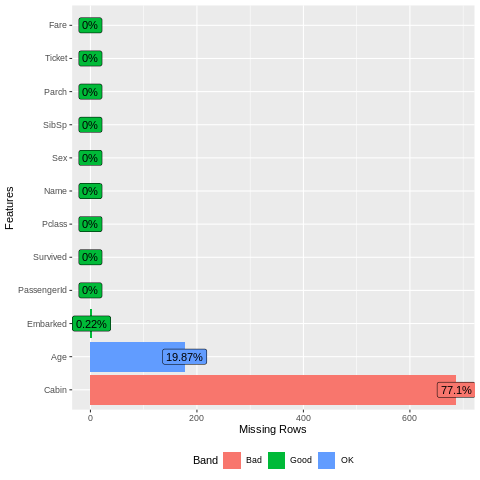

In [ ]:
%%R
# Ahora data está disponible en R
library(DataExplorer)

# Valores faltantes o missing
plot_missing(dataR)

La columna "Cabin" tiene un 77.1% de datos faltantes, lo que es una proporción significativamente alta en comparación con otras características del conjunto de datos que tienen poco o ningún dato faltante. Debido a la cantidad tan alta de datos faltantes en esta columna, podría ser difícil de imputar de manera precisa y su presencia podría no aportar información significativa o incluso sesgar los resultados al realizar análisis o construir modelos. Por lo tanto, es justificable considerar eliminar la columna "Cabin" del conjunto de datos.

In [ ]:
%%R
# Ahora data está disponible en R
library(DataExplorer)

# Valores faltantes o missing
profile_missing(dataR)

# A tibble: 12 × 3
   feature     num_missing pct_missing
   <fct>             <int>       <dbl>
 1 PassengerId           0     0      
 2 Survived              0     0      
 3 Pclass                0     0      
 4 Name                  0     0      
 5 Sex                   0     0      
 6 Age                 177     0.199  
 7 SibSp                 0     0      
 8 Parch                 0     0      
 9 Ticket                0     0      
10 Fare                  0     0      
11 Cabin               687     0.771  
12 Embarked              2     0.00224


La columna "Age" tiene un 19.9% de datos faltantes y, siendo una variable numérica, se opta por imputar con la media truncada para evitar la influencia de valores atípicos. Por otro lado, "Embarked", que es categórica y tiene solo un 0.224% de datos faltantes, se imputará con la moda, asignando el puerto de embarque más frecuente a los pocos registros faltantes. Estas decisiones de imputación están basadas en la naturaleza y cantidad de los datos faltantes en cada columna.

Las columnas que podrían considerarse menos relevantes para un análisis más profundo son:

**PassengerId:** Es simplemente un identificador y no tiene significado predictivo.

**Name:** Aunque el nombre en sí mismo no es predictivo, podría extraerse información como el título (por ejemplo, Mr., Mrs., Miss) para obtener más insights. Sin embargo, en su forma actual, no es relevante para el análisis predictivo.

**Ticket:** Hay una gran variedad de tickets, y no es claro cómo podrían agruparse o utilizarse de manera predictiva.

**Cabin:**  Aunque la cabina podría tener relevancia (por ejemplo, la proximidad a los botes salvavidas), hay muchos valores faltantes, lo que la hace difícil de usar.

In [ ]:
df_short=df[['Survived','Pclass','Sex','Age','SibSp','Embarked','Fare', 'Parch']]
df_short.head(10)

,Survived,Pclass,Sex,Age,SibSp,Embarked,Fare,Parch
0,0,3,male,22.0,1,S,7.25,0
1,1,1,female,38.0,1,C,71.28,0
2,1,3,female,26.0,0,S,7.93,0
3,1,1,female,35.0,1,S,53.10,0
4,0,3,male,35.0,0,S,8.05,0
5,0,3,male,NaN,0,Q,8.46,0
6,0,1,male,54.0,0,S,51.86,0
7,0,3,male,2.0,3,S,21.08,1
8,1,3,female,27.0,0,S,11.13,2
9,1,2,female,14.0,1,C,30.07,0


In [ ]:
#para saber los tipos de variables
df_short.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Embarked  889 non-null    object 
 6   Fare      891 non-null    float64
 7   Parch     891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


## Nulos

In [ ]:
#identificamos el numero de valores nulos
df_short.isnull().sum().sum()

179

<Axes: >

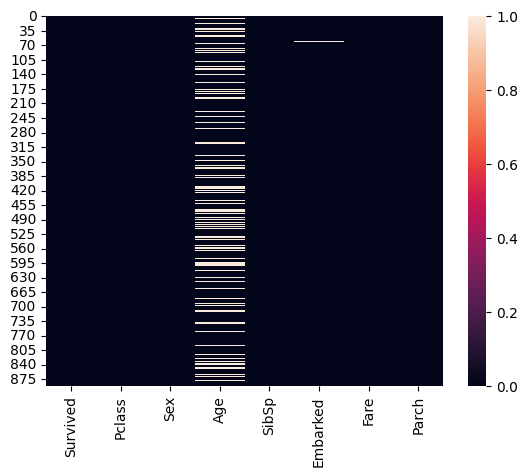

In [ ]:
#graficamos para ver si disponemos de valores nulos
sns.heatmap(df_short.isnull())

In [ ]:
df_short.columns[df_short.isnull().any()]

Index(['Age', 'Embarked'], dtype='object')

In [ ]:
miss = df_short.isnull().sum()/len(df)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

Embarked    0.002245
Age         0.198653
dtype: float64

## Estadísticos, Gráficos iniciales

In [ ]:
df_short.describe().T.apply(lambda s: s.apply('{0:.2f}'.format))  ## describe las variables

,count,mean,std,min,25%,50%,75%,max
Survived,891.00,0.38,0.49,0.00,0.00,0.00,1.00,1.00
Pclass,891.00,2.31,0.84,1.00,2.00,3.00,3.00,3.00
Age,714.00,29.70,14.53,0.40,20.12,28.00,38.00,80.00
SibSp,891.00,0.52,1.10,0.00,0.00,0.00,1.00,8.00
Fare,891.00,32.21,49.69,0.00,7.92,14.45,31.00,512.33
Parch,891.00,0.38,0.81,0.00,0.00,0.00,0.00,6.00


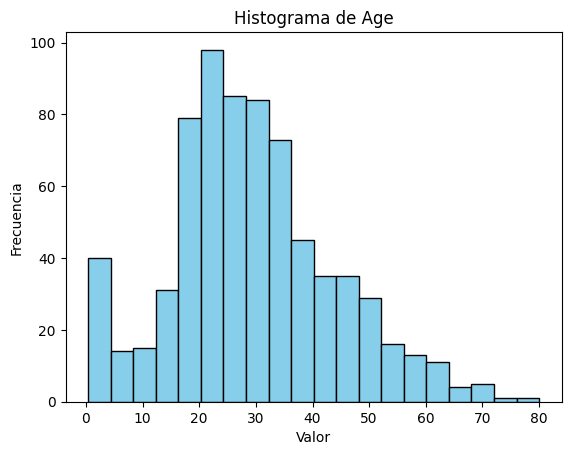

In [ ]:
plt.hist(df_short['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de Age')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

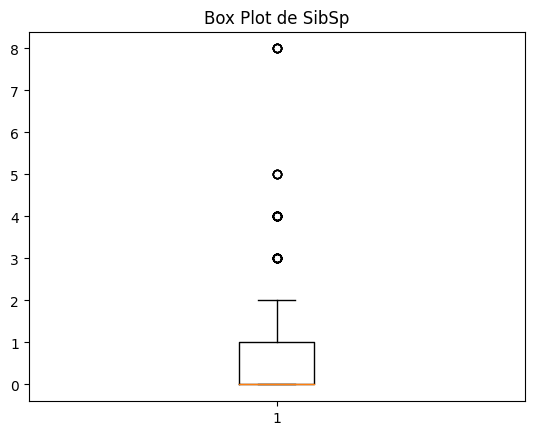

In [ ]:
# Crear un box plot
plt.boxplot(df_short['SibSp'])
plt.title('Box Plot de SibSp')
plt.show()

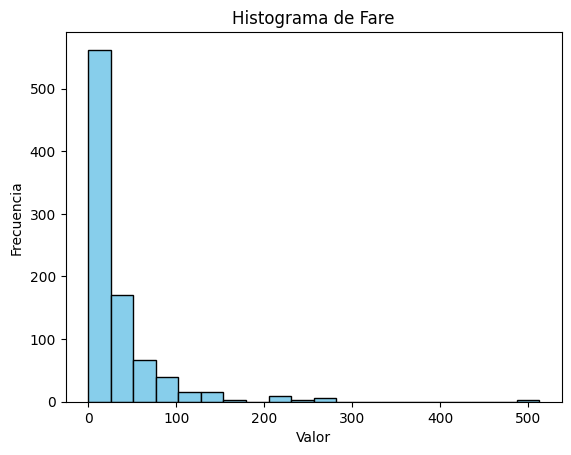

In [ ]:
plt.hist(df_short['Fare'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de Fare')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

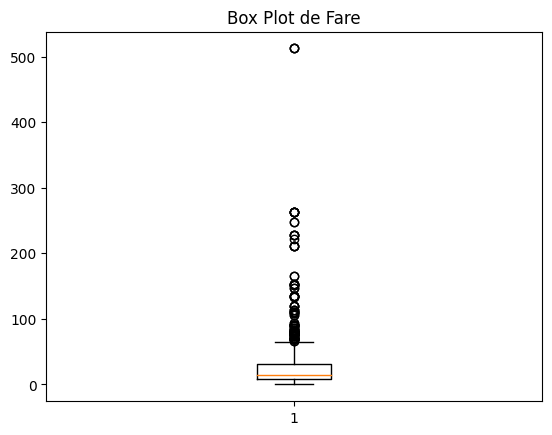

In [ ]:
# Crear un box plot
plt.boxplot(df_short['Fare'])
plt.title('Box Plot de Fare')
plt.show()

# ENTENDIMIENTO DE LOS DATOS

## Imputación de nulos

In [ ]:
# Respando de la data
df_short_trat = df_short.copy()

In [ ]:
# Media truncada para la columna Age
media_trunca = trim_mean(df['Age'].dropna(), proportiontocut=0.1)

# Reemplazamos los nulos en la columna Age por la media truncada
df_short_trat['Age'].fillna(media_trunca, inplace=True)

In [ ]:
#identificamos el numero de valores nulos
df_short_trat.isnull().sum().sum()

2

In [ ]:
# Moda para la columna Embarked
mode_Embarked = df_short_trat['Embarked'].mode().iloc[0]

# Reemplazamos los nulos en la columna Embarked con la moda
df_short_trat['Embarked'].fillna(mode_Embarked, inplace=True)

In [ ]:
#identificamos el numero de valores nulos
df_short_trat.isnull().sum().sum()

0

<Axes: >

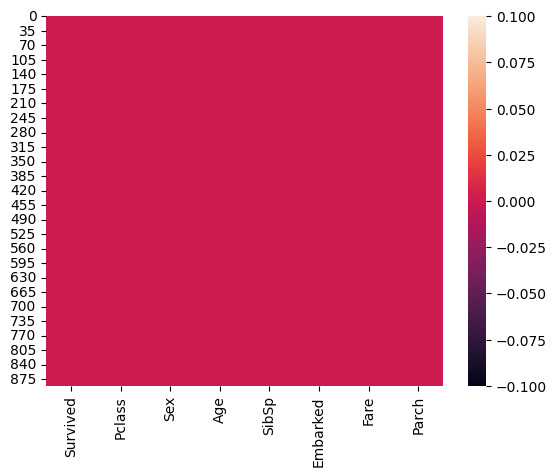

In [ ]:
#graficamos para ver si disponemos de valores nulos
sns.heatmap(df_short_trat.isnull())

## Correlaciones

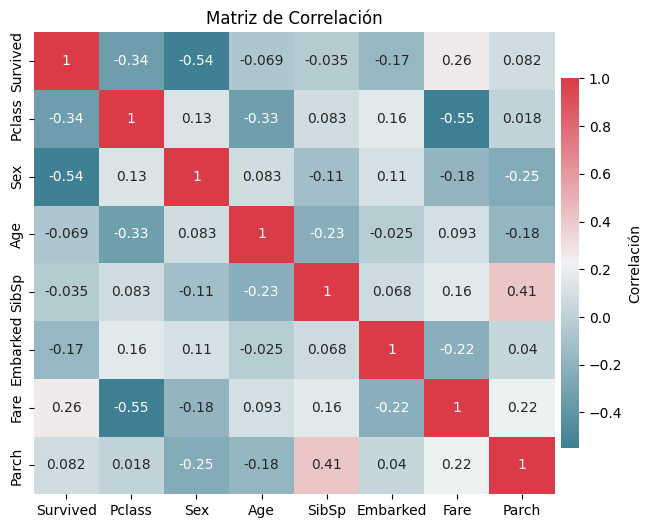

In [ ]:
# Transformamos las variables categóricas a numéricas para el análisis
df_short_trat_corr = df_short_trat.copy()
df_short_trat_corr['Sex'] = df_short_trat_corr['Sex'].astype('category').cat.codes
df_short_trat_corr['Embarked'] = df_short_trat_corr['Embarked'].astype('category').cat.codes

# Calcula la matriz de correlación
corr = df_short_trat_corr.corr()

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(8, 6))

# Mostrar la matriz de correlación
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap, cbar_kws={'label': 'Correlación', 'pad': 0.01, 'shrink': 0.8}, ax=ax)

# Título
ax.set_title("Matriz de Correlación")

plt.show()

## Variable Target


<bound method Series.sort_index of 0    0.616162
1    0.383838
Name: Survived, dtype: float64>

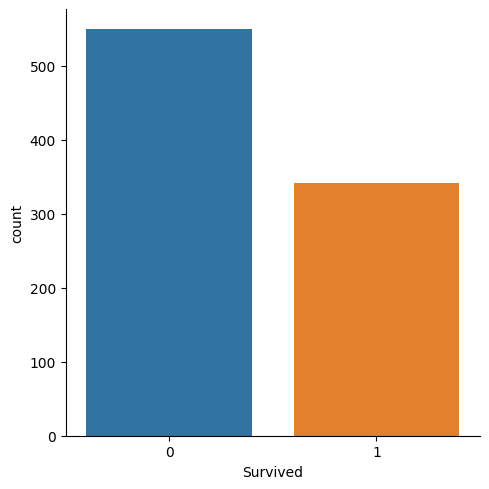

In [ ]:
sns.catplot(x='Survived',data=df_short_trat,kind="count")
df_short_trat['Survived'].value_counts(1).sort_index

Aproximadamente el 38% de las personas sobrevivieron, siendo el ratio general de 38%

## Variables cuantitativas

In [ ]:
Variables = ['Age', 'Fare']

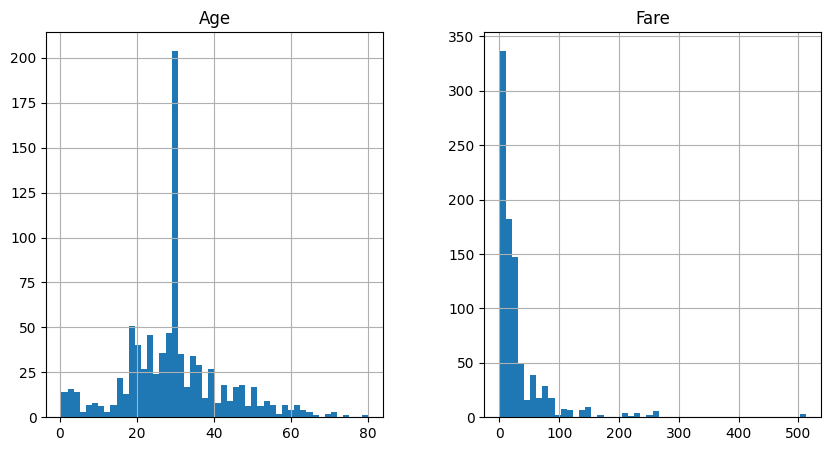

In [ ]:
df_short_trat[Variables].hist(bins = 50, figsize=(10,5))
plt.show()

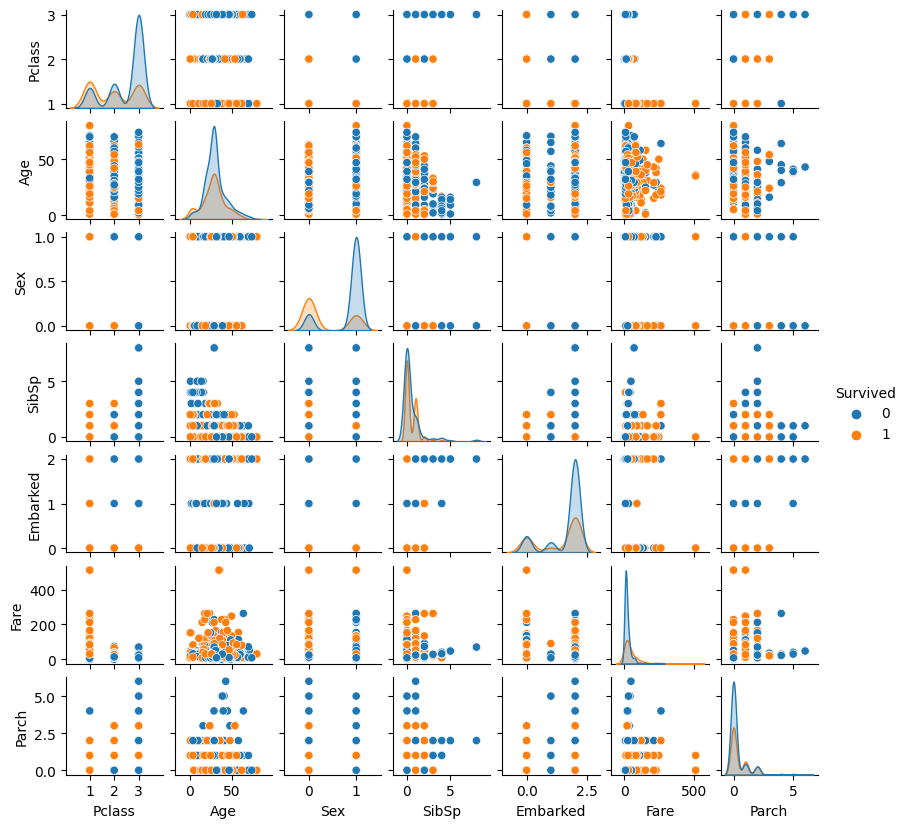

In [ ]:
Variables = ['Survived', 'Pclass', 'Age', 'Sex','SibSp','Embarked','Fare', 'Parch']
sns.pairplot(df_short_trat_corr[Variables], height=1.2, diag_kind = 'kde', hue='Survived')

1.   Distribución de Pclass vs. Survived: La mayoría de los pasajeros de la 3ª clase no sobrevivieron, mientras que una proporción mayor de pasajeros de la 1ª clase sí lo hizo. Esto sugiere que la clase del pasajero tuvo un impacto significativo en sus posibilidades de supervivencia.
1.   Relación entre Age y Survived: Las distribuciones de edad para los sobrevivientes y no sobrevivientes se superponen en gran medida. Sin embargo, se puede observar una concentración más alta de jóvenes (menos de 10 años aproximadamente) entre los sobrevivientes, lo que indica que los niños tenían más posibilidades de ser rescatados.
1.   Distribución de Sex vs. Survived: Aunque el gráfico muestra los datos de Sex como numéricos (0 y 1), podemos deducir que una proporción significativamente mayor del sexo representado por el número 1 sobrevivió en comparación con el sexo representado por el 0. Esto podría interpretarse como una indicación de que las mujeres tenían más probabilidades de sobrevivir que los hombres.
1.   Relación entre Fare y Survived: Se puede observar que aquellos que pagaron tarifas más altas (especialmente por encima de 100) tuvieron una mayor tasa de supervivencia. Esto se correlaciona con la observación sobre Pclass, ya que los pasajeros de la 1ª clase suelen pagar tarifas más altas.
1.   Distribución de Embarked vs. Survived: La distribución de puntos sugiere que los pasajeros que embarcaron en el puerto representado por el valor 1 tuvieron la menor tasa de supervivencia en comparación con los otros dos puertos. Aunque esto podría estar relacionado con otros factores, como la clase del pasaje o la tarifa pagada.






## Variables cualitativas

### Embarked

<bound method Series.sort_index of S    0.725028
C    0.188552
Q    0.086420
Name: Embarked, dtype: float64>

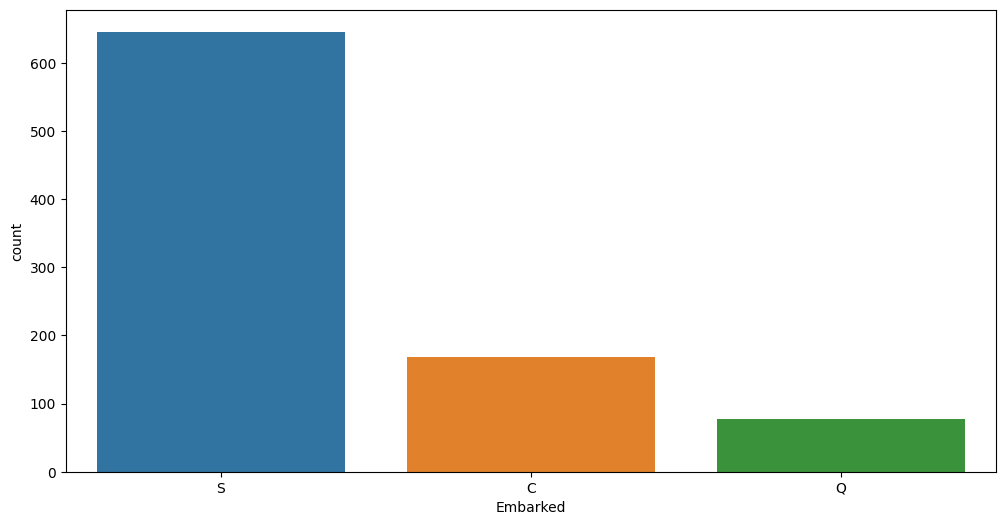

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data = df_short_trat, x = "Embarked")
df_short_trat['Embarked'].value_counts(1).sort_index

El embarque S(SOUTHAMPTON) tiene el 72.50% de casos del total de las observaciones

Survived               
            count  sum      mean
Embarked                        
C             168   93  0.553571
Q              77   30  0.389610
S             646  219  0.339009

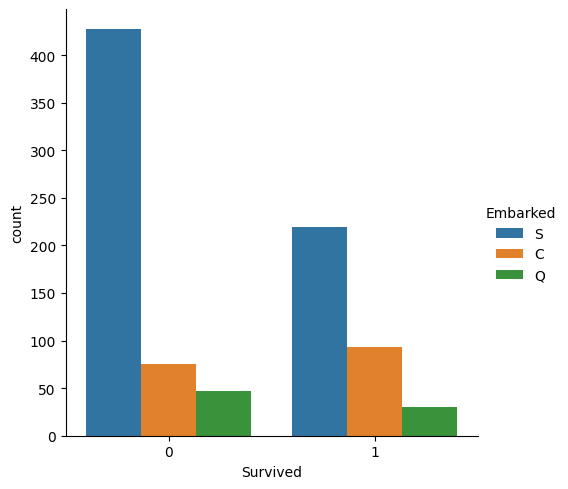

In [ ]:
sns.catplot(x='Survived',data=df_short_trat,hue='Embarked', kind="count")
df_short_trat[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).agg(['count','sum','mean']).sort_values(by=('Survived', 'mean'), ascending=False)

En los EMBARQUES "C", es mayor la probabilidad que se sobrevivan, dado que tiene mayor porcentaje que el ratio general(38%).

En los EMBARQUES "Q" tiene una probabilidad ligeramente superior al ratio general para que sobreviva

### Pclass

<bound method Series.sort_index of 3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64>

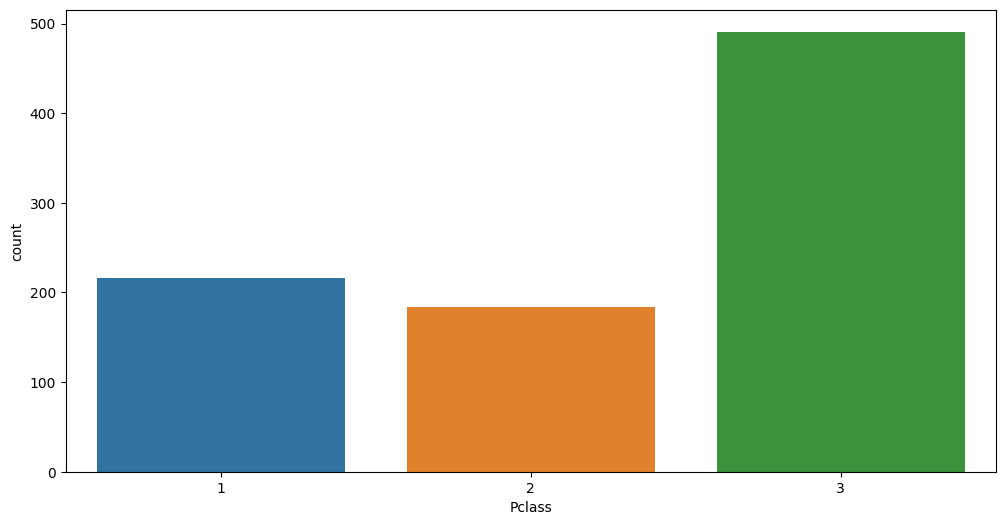

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data = df_short_trat, x = "Pclass")
df_short_trat['Pclass'].value_counts(1).sort_index

La clase 3 tiene el 55.1066% de casos del total de las observaciones

Survived               
          count  sum      mean
Pclass                        
1           216  136  0.629630
2           184   87  0.472826
3           491  119  0.242363

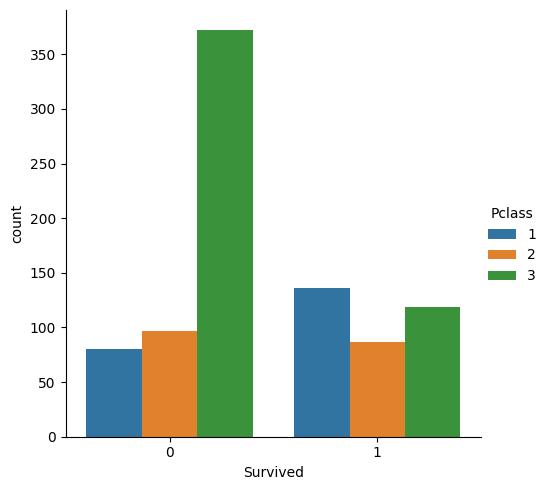

In [ ]:
sns.catplot(x='Survived',data=df_short_trat,hue='Pclass', kind="count")
df_short_trat[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).agg(['count','sum','mean']).sort_values(by=('Survived', 'mean'), ascending=False)

En las CLASES "1" Y "2", es mayor la probabilidad que se sobrevivan, dado que tiene mayor porcentaje que el ratio general(38%).

### Sex

<bound method Series.sort_index of male      0.647587
female    0.352413
Name: Sex, dtype: float64>

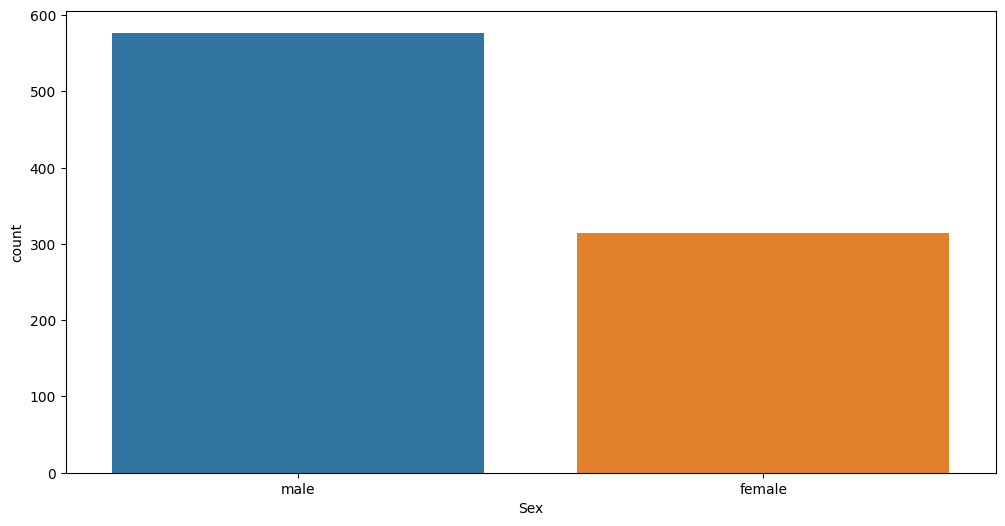

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data = df_short_trat, x = "Sex")
df_short_trat['Sex'].value_counts(1).sort_index

El sexo "male" tiene el 64.7587% de casos del total de las observaciones

Survived               
          count  sum      mean
Sex                           
female      314  233  0.742038
male        577  109  0.188908

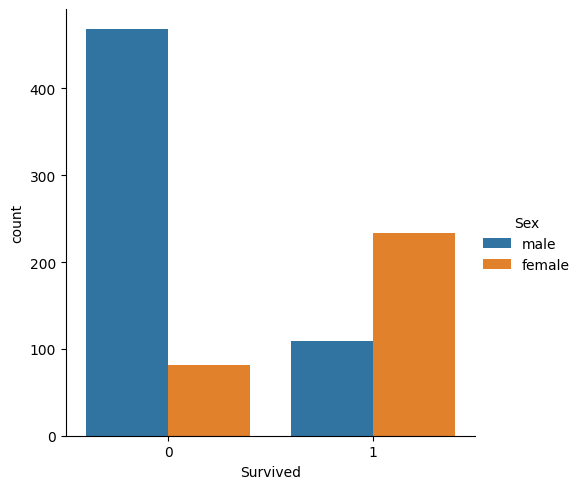

In [ ]:
sns.catplot(x='Survived',data=df_short_trat,hue='Sex', kind="count")
df_short_trat[['Sex', 'Survived']].groupby(['Sex'], as_index=False).agg(['count','sum','mean']).sort_values(by=('Survived', 'mean'), ascending=False)

El SEXO "female", es mayor la probabilidad que se sobrevivan, dado que tiene mayor porcentaje que el ratio general(38%).

### SibSp

<bound method Series.sort_index of 0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64>

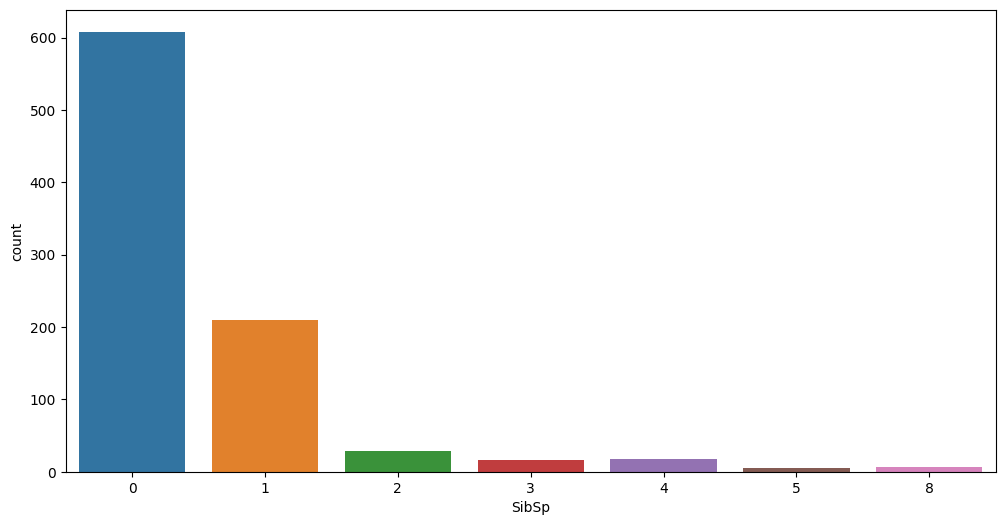

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data = df_short_trat, x = "SibSp")
df_short_trat['SibSp'].value_counts(1).sort_index


El número de hermanos (Sib de "siblings") y cónyuges (Sp de "spouses") que es la cantidad de cero, tiene el 68.2379% de casos del total de las observaciones

Survived               
         count  sum      mean
SibSp                        
1          209  112  0.535885
2           28   13  0.464286
0          608  210  0.345395
3           16    4  0.250000
4           18    3  0.166667
5            5    0  0.000000
8            7    0  0.000000

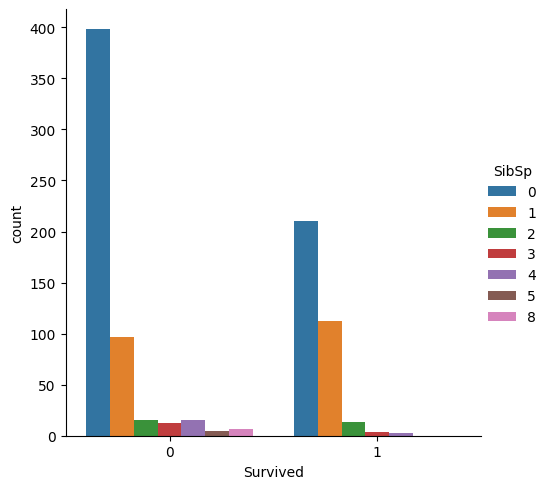

In [ ]:
sns.catplot(x='Survived',data=df_short_trat,hue='SibSp', kind="count")
df_short_trat[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).agg(['count','sum','mean']).sort_values(by=('Survived', 'mean'), ascending=False)

En SibSp los que tenían 1 y 2 número de hermanos (Sib de "siblings") y cónyuges (Sp de "spouses"), es mayor la probabilidad que se sobrevivan, dado que tiene mayor porcentaje que el ratio general(38%).

Los que no tenían hermanos y cónyuges tiene una probabilidad aproximada al ratio general para SOBREVIVIR.

### Parch

<bound method Series.sort_index of 0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: Parch, dtype: float64>

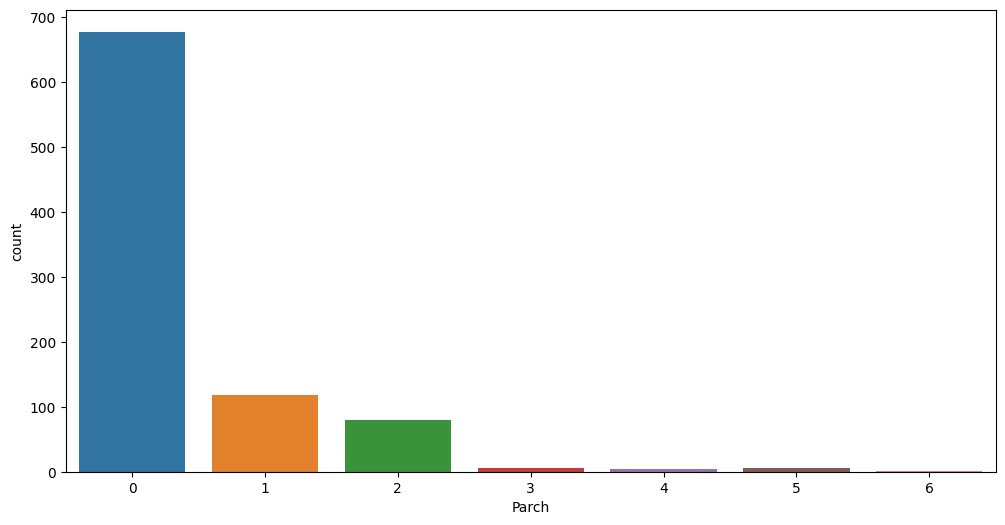

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data = df_short_trat, x = "Parch")
df_short_trat['Parch'].value_counts(1).sort_index

El número de padres (Par de "parents") y hijos (ch de "children") que es la cantidad de cero, tiene el 76.0943% de casos del total de las observaciones

Survived               
         count  sum      mean
Parch                        
3            5    3  0.600000
1          118   65  0.550847
2           80   40  0.500000
0          678  233  0.343658
5            5    1  0.200000
4            4    0  0.000000
6            1    0  0.000000

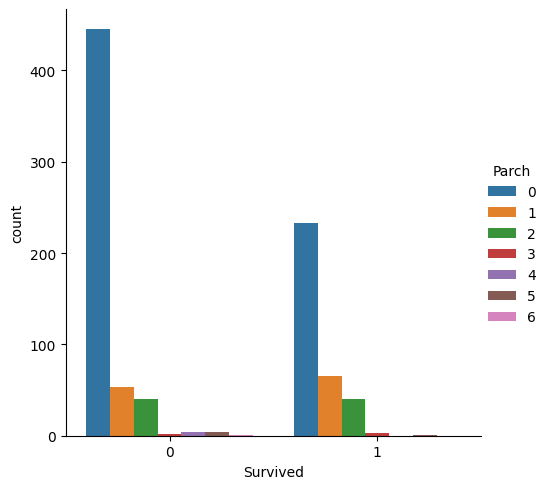

In [ ]:
sns.catplot(x='Survived',data=df_short_trat,hue='Parch', kind="count")
df_short_trat[['Parch', 'Survived']].groupby(['Parch'], as_index=False).agg(['count','sum','mean']).sort_values(by=('Survived', 'mean'), ascending=False)

En Parch los que tenían 1, 2 y 3 número de padres y hijos, es mayor la probabilidad que se sobrevivan, dado que tiene mayor porcentaje que el ratio general(38%).

Los que no tenían padres y hijos tienen una probabilidad aproximada al ratio general para SOBREVIVIR.

# CATEGORIZACIÓN DE LOS DATOS

## SibSp

In [ ]:
df_short_trat_cat = df_short_trat.copy()

In [ ]:
df_short_trat_cat['SibSp'] = np.where(df_short_trat_cat['SibSp'] == 0, 'SIN FAMILIAR', 'CON FAMILIAR')
df_short_trat_cat.head()

,Survived,Pclass,Sex,Age,SibSp,Embarked,Fare,Parch
0,0,3,male,22.0,CON FAMILIAR,S,7.25,0
1,1,1,female,38.0,CON FAMILIAR,C,71.28,0
2,1,3,female,26.0,SIN FAMILIAR,S,7.93,0
3,1,1,female,35.0,CON FAMILIAR,S,53.10,0
4,0,3,male,35.0,SIN FAMILIAR,S,8.05,0


## Age

In [ ]:
# Crear una función para categorizar las edades
def categorizar_edad(edad):
    if edad < 18:
        return 'MENOR DE EDAD'
    elif edad >= 18 and edad < 65:
        return 'ADULTO'
    else:
        return 'ADULTO MAYOR'

In [ ]:
# Aplicar la función a la columna 'Age' y crear una nueva columna 'Age_Category'
df_short_trat_cat['Age'] = df_short_trat_cat['Age'].apply(categorizar_edad)
df_short_trat_cat.head()

,Survived,Pclass,Sex,Age,SibSp,Embarked,Fare,Parch
0,0,3,male,ADULTO,CON FAMILIAR,S,7.25,0
1,1,1,female,ADULTO,CON FAMILIAR,C,71.28,0
2,1,3,female,ADULTO,SIN FAMILIAR,S,7.93,0
3,1,1,female,ADULTO,CON FAMILIAR,S,53.10,0
4,0,3,male,ADULTO,SIN FAMILIAR,S,8.05,0


## Survived

In [ ]:
df_short_trat_cat['Survived'] = np.where(df_short_trat_cat['Survived'] == 0, 'NO SOBREVIVIO', 'SOBREVIVIO')
df_short_trat_cat.head()

,Survived,Pclass,Sex,Age,SibSp,Embarked,Fare,Parch
0,NO SOBREVIVIO,3,male,ADULTO,CON FAMILIAR,S,7.25,0
1,SOBREVIVIO,1,female,ADULTO,CON FAMILIAR,C,71.28,0
2,SOBREVIVIO,3,female,ADULTO,SIN FAMILIAR,S,7.93,0
3,SOBREVIVIO,1,female,ADULTO,CON FAMILIAR,S,53.10,0
4,NO SOBREVIVIO,3,male,ADULTO,SIN FAMILIAR,S,8.05,0


## Pclass

In [ ]:
df_short_trat_cat['Pclass'] = np.where(df_short_trat_cat['Pclass'] == 1, 'UPPER',
                                        np.where(df_short_trat_cat['Pclass'] == 2, 'MIDDLE',
                                        np.where(df_short_trat_cat['Pclass'] == 3, 'LOWER', 'OTHER')))

df_short_trat_cat.head()

,Survived,Pclass,Sex,Age,SibSp,Embarked,Fare,Parch
0,NO SOBREVIVIO,LOWER,male,ADULTO,CON FAMILIAR,S,7.25,0
1,SOBREVIVIO,UPPER,female,ADULTO,CON FAMILIAR,C,71.28,0
2,SOBREVIVIO,LOWER,female,ADULTO,SIN FAMILIAR,S,7.93,0
3,SOBREVIVIO,UPPER,female,ADULTO,CON FAMILIAR,S,53.10,0
4,NO SOBREVIVIO,LOWER,male,ADULTO,SIN FAMILIAR,S,8.05,0


## Sex

In [ ]:
df_short_trat_cat['Sex'] = np.where(df_short_trat_cat['Sex'] == 'male', 'MALE', 'FEMALE')
df_short_trat_cat.head()

,Survived,Pclass,Sex,Age,SibSp,Embarked,Fare,Parch
0,NO SOBREVIVIO,LOWER,MALE,ADULTO,CON FAMILIAR,S,7.25,0
1,SOBREVIVIO,UPPER,FEMALE,ADULTO,CON FAMILIAR,C,71.28,0
2,SOBREVIVIO,LOWER,FEMALE,ADULTO,SIN FAMILIAR,S,7.93,0
3,SOBREVIVIO,UPPER,FEMALE,ADULTO,CON FAMILIAR,S,53.10,0
4,NO SOBREVIVIO,LOWER,MALE,ADULTO,SIN FAMILIAR,S,8.05,0


## Embarked

In [ ]:
df_short_trat_cat['Embarked'] = np.where(df_short_trat_cat['Embarked'] == 'C', 'CHERBOURG',
                                        np.where(df_short_trat_cat['Embarked'] == 'Q', 'QUEENSTOWN',
                                        np.where(df_short_trat_cat['Embarked'] == 'S', 'SOUTHAMPTON', 'OTRA')))
df_short_trat_cat.head()

,Survived,Pclass,Sex,Age,SibSp,Embarked,Fare,Parch
0,NO SOBREVIVIO,LOWER,MALE,ADULTO,CON FAMILIAR,SOUTHAMPTON,7.25,0
1,SOBREVIVIO,UPPER,FEMALE,ADULTO,CON FAMILIAR,CHERBOURG,71.28,0
2,SOBREVIVIO,LOWER,FEMALE,ADULTO,SIN FAMILIAR,SOUTHAMPTON,7.93,0
3,SOBREVIVIO,UPPER,FEMALE,ADULTO,CON FAMILIAR,SOUTHAMPTON,53.10,0
4,NO SOBREVIVIO,LOWER,MALE,ADULTO,SIN FAMILIAR,SOUTHAMPTON,8.05,0


## Fare

In [ ]:
# Definir los límites de las categorías
bins = [0, 50, 100, float('inf')]  # Define los límites de las categorías

# Definir las etiquetas para las categorías
labels = ['BAJA', 'MEDIA', 'ALTA']

# Crear una nueva columna 'Fare_Category' basada en 'Fare'
df_short_trat_cat['Fare'] = pd.cut(df_short_trat_cat['Fare'], bins=bins, labels=labels, include_lowest=True)
df_short_trat_cat.head()

,Survived,Pclass,Sex,Age,SibSp,Embarked,Fare,Parch
0,NO SOBREVIVIO,LOWER,MALE,ADULTO,CON FAMILIAR,SOUTHAMPTON,BAJA,0
1,SOBREVIVIO,UPPER,FEMALE,ADULTO,CON FAMILIAR,CHERBOURG,MEDIA,0
2,SOBREVIVIO,LOWER,FEMALE,ADULTO,SIN FAMILIAR,SOUTHAMPTON,BAJA,0
3,SOBREVIVIO,UPPER,FEMALE,ADULTO,CON FAMILIAR,SOUTHAMPTON,MEDIA,0
4,NO SOBREVIVIO,LOWER,MALE,ADULTO,SIN FAMILIAR,SOUTHAMPTON,BAJA,0


## Parch

In [ ]:
df_short_trat_cat['Parch'] = np.where(df_short_trat_cat['Parch'] == 0, 'SIN FAMILIAR', 'CON FAMILIAR')
df_short_trat_cat.head()

,Survived,Pclass,Sex,Age,SibSp,Embarked,Fare,Parch
0,NO SOBREVIVIO,LOWER,MALE,ADULTO,CON FAMILIAR,SOUTHAMPTON,BAJA,SIN FAMILIAR
1,SOBREVIVIO,UPPER,FEMALE,ADULTO,CON FAMILIAR,CHERBOURG,MEDIA,SIN FAMILIAR
2,SOBREVIVIO,LOWER,FEMALE,ADULTO,SIN FAMILIAR,SOUTHAMPTON,BAJA,SIN FAMILIAR
3,SOBREVIVIO,UPPER,FEMALE,ADULTO,CON FAMILIAR,SOUTHAMPTON,MEDIA,SIN FAMILIAR
4,NO SOBREVIVIO,LOWER,MALE,ADULTO,SIN FAMILIAR,SOUTHAMPTON,BAJA,SIN FAMILIAR


# TABLA DE FRECUENCIAS, TABLA DE CONTINGENCIAS Y GRÁFICOS

## Tabla de frecuencias - Gráficos

### SibSp

In [ ]:
# tabla de frecuencia
frecuencia_absoluta=pd.value_counts(df_short_trat_cat['SibSp'])
frecuencia_relativa=100 * df_short_trat_cat['SibSp'].value_counts() / len(df_short_trat_cat['SibSp'])
tabla_frecuencia_SibSp = pd.concat([frecuencia_absoluta,frecuencia_relativa], axis=1)
tabla_frecuencia_SibSp.columns = ['Frecuencia absoluta', 'Frecuencia relativa']
tabla_frecuencia_SibSp.head()

,Frecuencia absoluta,Frecuencia relativa
SIN FAMILIAR,608,68.237935
CON FAMILIAR,283,31.762065


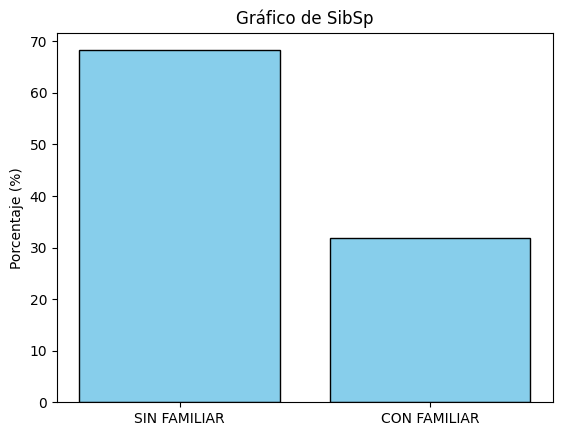

In [ ]:
# Contar la frecuencia de cada valor único en la columna 'SibSp'
sibsp_counts = df_short_trat_cat['SibSp'].value_counts()

# Calcular los porcentajes
total = len(df_short_trat_cat['SibSp'])
percentages = (sibsp_counts / total) * 100

# Extraer los valores únicos y sus porcentajes
values = percentages.index
frequencies = percentages.values

# Gráfico de barras en porcentajes
plt.bar(values, frequencies, color='skyblue', edgecolor='black')
plt.title('Gráfico de SibSp')
plt.ylabel('Porcentaje (%)')
plt.show()


El número de SIN FAMILIAR es la tiene el 68.2379% de casos del total de las observaciones

### Age

In [ ]:
# tabla de frecuencia
frecuencia_absoluta=pd.value_counts(df_short_trat_cat['Age'])
frecuencia_relativa=100 * df_short_trat_cat['Age'].value_counts() / len(df_short_trat_cat['Age'])
tabla_frecuencia_Age = pd.concat([frecuencia_absoluta,frecuencia_relativa], axis=1)
tabla_frecuencia_Age.columns = ['Frecuencia absoluta', 'Frecuencia relativa']
tabla_frecuencia_Age.head()

,Frecuencia absoluta,Frecuencia relativa
ADULTO,767,86.083053
MENOR DE EDAD,113,12.682379
ADULTO MAYOR,11,1.234568


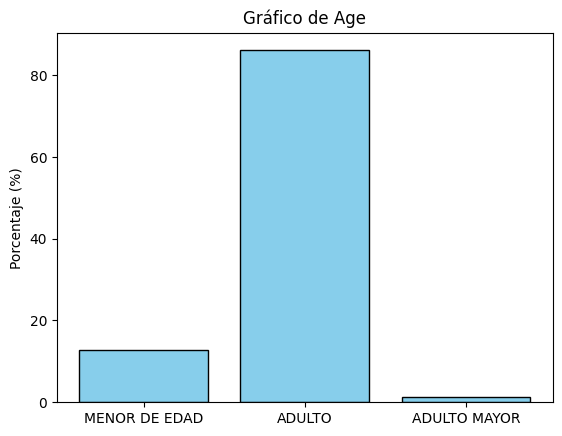

In [ ]:
# Contar la frecuencia de cada valor único en la columna 'Age'
age_counts = df_short_trat_cat['Age'].value_counts()

# Calcular los porcentajes
total = len(df_short_trat_cat['Age'])
percentages = (age_counts / total) * 100

# Ordenar las categorías en el eje X según el orden deseado
order = ["MENOR DE EDAD", "ADULTO", "ADULTO MAYOR"]
percentages = percentages.reindex(order)

# Gráfico de barras en porcentajes
plt.bar(percentages.index, percentages.values, color='skyblue', edgecolor='black')
plt.title('Gráfico de Age')
plt.ylabel('Porcentaje (%)')
plt.show()


El número de ADULTO es la tiene el 86.083053% de casos del total de las observaciones

### Pclass

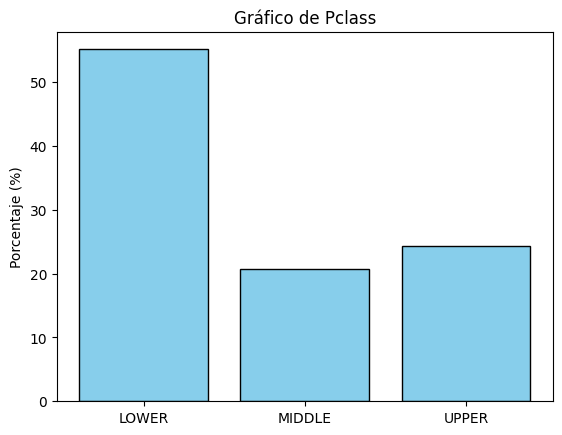

In [ ]:
# Contar la frecuencia de cada valor único en la columna 'Pclass'
pclass_counts = df_short_trat_cat['Pclass'].value_counts()

# Calcular los porcentajes
total = len(df_short_trat_cat['Pclass'])
percentages = (pclass_counts / total) * 100

# Ordenar las categorías en el eje X según el orden deseado
order = ["LOWER", "MIDDLE", "UPPER"]
percentages = percentages.reindex(order)

# Gráfico de barras en porcentajes
plt.bar(percentages.index, percentages.values, color='skyblue', edgecolor='black')
plt.title('Gráfico de Pclass')
plt.ylabel('Porcentaje (%)')
plt.show()

El número de CLASE BAJA es la tiene más de casos del total de las observaciones

### Sex

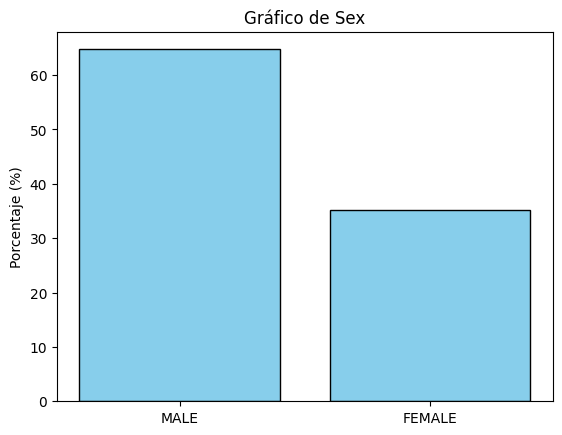

In [ ]:
# Contar la frecuencia de cada valor único en la columna 'Sex'
sex_counts = df_short_trat_cat['Sex'].value_counts()

# Calcular los porcentajes
total = len(df_short_trat_cat['Sex'])
percentages = (sex_counts / total) * 100

# Extraer los valores únicos y sus porcentajes
values = percentages.index
frequencies = percentages.values

# Gráfico de barras en porcentajes
plt.bar(values, frequencies, color='skyblue', edgecolor='black')
plt.title('Gráfico de Sex')
plt.ylabel('Porcentaje (%)')
plt.show()

El número de HOMBRES es la tiene más de casos del total de las observaciones

### Embarked

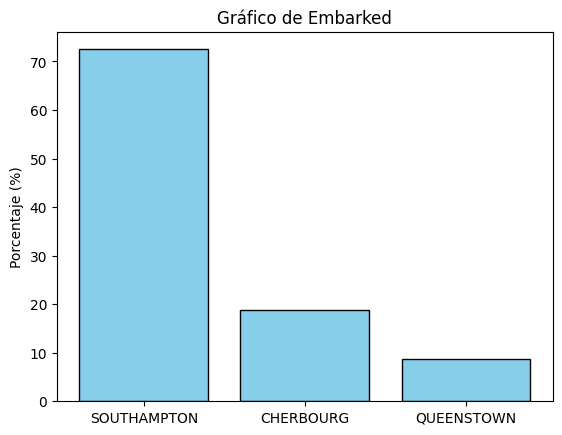

In [ ]:
# Contar la frecuencia de cada valor único en la columna 'Embarked'
embarked_counts = df_short_trat_cat['Embarked'].value_counts()

# Calcular los porcentajes
total = len(df_short_trat_cat['Embarked'])
percentages = (embarked_counts / total) * 100

# Extraer los valores únicos y sus porcentajes
values = percentages.index
frequencies = percentages.values

# Gráfico de barras en porcentajes
plt.bar(values, frequencies, color='skyblue', edgecolor='black')
plt.title('Gráfico de Embarked')
plt.ylabel('Porcentaje (%)')
plt.show()

El número de embarcados en SOUTHAMPTON es la tiene más de casos del total de las observaciones

### Fare

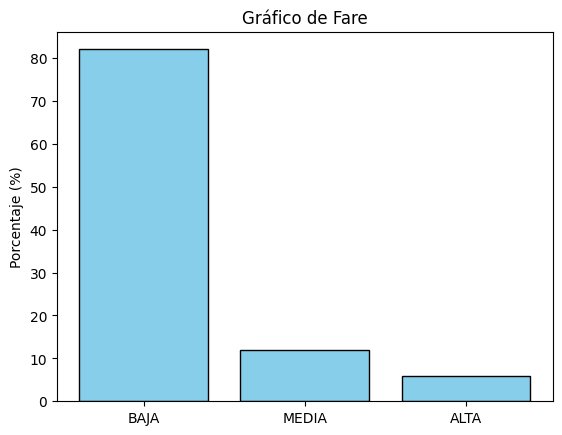

In [ ]:
# Contar la frecuencia de cada valor único en la columna 'Fare'
fare_counts = df_short_trat_cat['Fare'].value_counts()

# Calcular los porcentajes
total = len(df_short_trat_cat['Fare'])
percentages = (fare_counts / total) * 100

# Ordenar las categorías en el eje X según el orden deseado
order = ["BAJA", "MEDIA", "ALTA"]
percentages = percentages.reindex(order)

# Gráfico de barras en porcentajes
plt.bar(percentages.index, percentages.values, color='skyblue', edgecolor='black')
plt.title('Gráfico de Fare')
plt.ylabel('Porcentaje (%)')
plt.show()

El número de BAJA es la tiene más de casos del total de las observaciones

### Parch

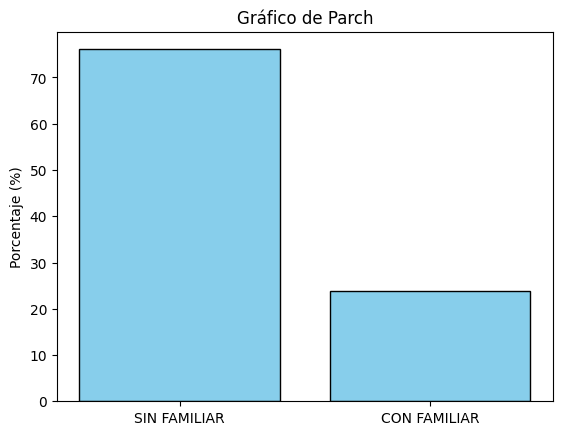

In [ ]:
# Contar la frecuencia de cada valor único en la columna 'Parch'
parch_counts = df_short_trat_cat['Parch'].value_counts()

# Calcular los porcentajes
total = len(df_short_trat_cat['Parch'])
percentages = (parch_counts / total) * 100

# Extraer los valores únicos y sus porcentajes
values = percentages.index
frequencies = percentages.values

# Gráfico de barras en porcentajes
plt.bar(values, frequencies, color='skyblue', edgecolor='black')
plt.title('Gráfico de Parch')
plt.ylabel('Porcentaje (%)')
plt.show()

El número de SIN FAMILIAR es la tiene más de casos del total de las observaciones

## Tabla de Contingencia, Probabilidades y Gráficos

In [ ]:
df_short_trat_cat

,Survived,Pclass,Sex,Age,SibSp,Embarked,Fare,Parch
0,NO SOBREVIVIO,LOWER,MALE,ADULTO,CON FAMILIAR,SOUTHAMPTON,BAJA,SIN FAMILIAR
1,SOBREVIVIO,UPPER,FEMALE,ADULTO,CON FAMILIAR,CHERBOURG,MEDIA,SIN FAMILIAR
2,SOBREVIVIO,LOWER,FEMALE,ADULTO,SIN FAMILIAR,SOUTHAMPTON,BAJA,SIN FAMILIAR
3,SOBREVIVIO,UPPER,FEMALE,ADULTO,CON FAMILIAR,SOUTHAMPTON,MEDIA,SIN FAMILIAR
4,NO SOBREVIVIO,LOWER,MALE,ADULTO,SIN FAMILIAR,SOUTHAMPTON,BAJA,SIN FAMILIAR
...,...,...,...,...,...,...,...,...
886,NO SOBREVIVIO,MIDDLE,MALE,ADULTO,SIN FAMILIAR,SOUTHAMPTON,BAJA,SIN FAMILIAR
887,SOBREVIVIO,UPPER,FEMALE,ADULTO,SIN FAMILIAR,SOUTHAMPTON,BAJA,SIN FAMILIAR
888,NO SOBREVIVIO,LOWER,FEMALE,ADULTO,CON FAMILIAR,SOUTHAMPTON,BAJA,CON FAMILIAR
889,SOBREVIVIO,UPPER,MALE,ADULTO,SIN FAMILIAR,CHERBOURG,BAJA,SIN FAMILIAR


### SURVIVED - PCLASS

In [ ]:
df_short_trat[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).agg(['count','sum','mean']).sort_values(by=('Survived', 'mean'), ascending=False)

Survived               
          count  sum      mean
Pclass                        
1           216  136  0.629630
2           184   87  0.472826
3           491  119  0.242363

In [ ]:
# Tabla de contingencia
table_Cont_Surv_pclass=pd.crosstab(index=df_short_trat_cat['Survived'],
                                    columns=df_short_trat_cat['Pclass'], margins=True)
table_Cont_Surv_pclass.head()

Pclass,LOWER,MIDDLE,UPPER,All
Survived,,,,
NO SOBREVIVIO,372,97,80,549
SOBREVIVIO,119,87,136,342
All,491,184,216,891


In [ ]:
# PROBABILIDADES
# Proporción de pasajeros
proportion_survived = table_Cont_Surv_pclass.loc['SOBREVIVIO'] / table_Cont_Surv_pclass.loc['All']

# Mostrando solo las proporciones de las clases (excluyendo el total global 'All')
proportion_survived = proportion_survived.drop('All')
proportion_survived

Pclass
LOWER     0.242363
MIDDLE    0.472826
UPPER     0.629630
dtype: float64

In [ ]:
# tabla de contingencia en porcentajes relativos total
pd.crosstab(index=df_short_trat_cat['Survived'], columns=df_short_trat_cat['Pclass'],
            margins=True).apply(lambda r: r/len(df_short_trat_cat) *100,
                                axis=0)

Pclass,LOWER,MIDDLE,UPPER,All
Survived,,,,
NO SOBREVIVIO,41.750842,10.886644,8.978676,61.616162
SOBREVIVIO,13.355780,9.764310,15.263749,38.383838
All,55.106622,20.650954,24.242424,100.000000


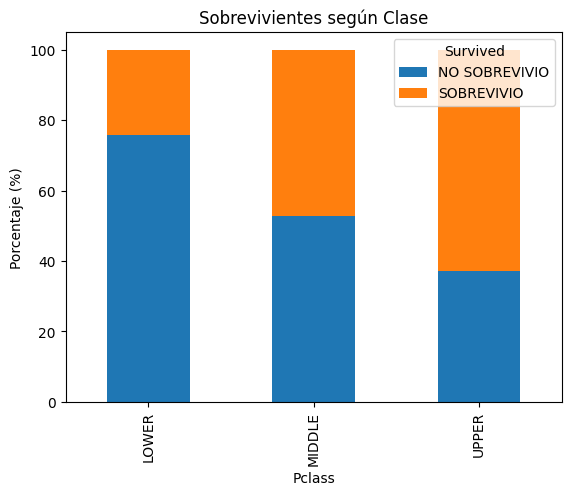

In [ ]:
# Orden de las categorías
order = ["LOWER", "MIDDLE", "UPPER"]

# Crear tabla de contingencia de frecuencias relativas en porcentajes
ct = pd.crosstab(index=df_short_trat_cat['Pclass'], columns=df_short_trat_cat['Survived'])
ct_percentage = (ct.T / ct.sum(axis=1)).T * 100

# Ordenar las categorías según el orden deseado
ct_percentage = ct_percentage.reindex(order)

# Gráfico de barras
plot = ct_percentage.plot(kind='bar', stacked=True)
plt.title('Sobrevivientes según Clase')
plt.ylabel('Porcentaje (%)')
plt.show()

La distribución cambia, quiere decir que la CLASE sí afecta a la probabilidad que una persona sobreviva.

### SURVIDED - SEX

In [ ]:
df_short_trat[['Sex', 'Survived']].groupby(['Sex'], as_index=False).agg(['count','sum','mean']).sort_values(by=('Survived', 'mean'), ascending=False)

Survived               
          count  sum      mean
Sex                           
female      314  233  0.742038
male        577  109  0.188908

In [ ]:
# Tabla de contingencia sex / survived
table_Cont_Surv_Sex=pd.crosstab(index=df_short_trat_cat['Survived'],
                                    columns=df_short_trat_cat['Sex'], margins=True)
table_Cont_Surv_Sex.head()

Sex,FEMALE,MALE,All
Survived,,,
NO SOBREVIVIO,81,468,549
SOBREVIVIO,233,109,342
All,314,577,891


In [ ]:
# PROBABILIDADES
# Proporción de pasajeros
proportion_survived = table_Cont_Surv_Sex.loc['SOBREVIVIO'] / table_Cont_Surv_Sex.loc['All']

# Mostrando solo las proporciones de las clases (excluyendo el total global 'All')
proportion_survived = proportion_survived.drop('All')
proportion_survived

Sex
FEMALE    0.742038
MALE      0.188908
dtype: float64

In [ ]:
# tabla de contingencia en porcentajes relativos total
pd.crosstab(index=df_short_trat_cat['Survived'], columns=df_short_trat_cat['Sex'],
            margins=True).apply(lambda r: r/len(df_short_trat_cat) *100,
                                axis=1)

Sex,FEMALE,MALE,All
Survived,,,
NO SOBREVIVIO,9.090909,52.525253,61.616162
SOBREVIVIO,26.150393,12.233446,38.383838
All,35.241302,64.758698,100.000000


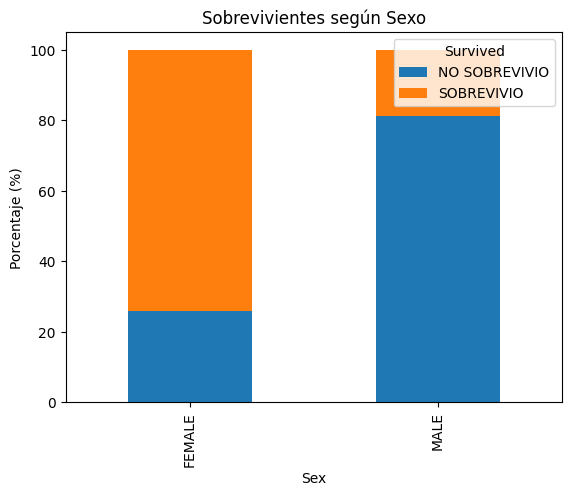

In [ ]:
# Orden de las categorías
order = ["FEMALE", "MALE"]

# Crear tabla de contingencia de frecuencias relativas en porcentajes
ct = pd.crosstab(index=df_short_trat_cat['Sex'], columns=df_short_trat_cat['Survived'])
ct_percentage = (ct.T / ct.sum(axis=1)).T * 100

# Ordenar las categorías según el orden deseado
ct_percentage = ct_percentage.reindex(order)

# Gráfico de barras
plot = ct_percentage.plot(kind='bar', stacked=True)
plt.title('Sobrevivientes según Sexo')
plt.ylabel('Porcentaje (%)')
plt.show()

La distribución cambia, quiere decir que SEXO sí afecta a la probabilidad que una persona sobreviva.

Esto podría interpretarse como una indicación de que las mujeres tenían más probabilidades de sobrevivir que los hombres.

### SURVIDED - AGE

In [ ]:
# Tabla de contingencia age / survived
table_Cont_Surv_Age=pd.crosstab(index=df_short_trat_cat['Survived'],
                                  columns=df_short_trat_cat['Age'], margins=True)
table_Cont_Surv_Age.head()

Age,ADULTO,ADULTO MAYOR,MENOR DE EDAD,All
Survived,,,,
NO SOBREVIVIO,487,10,52,549
SOBREVIVIO,280,1,61,342
All,767,11,113,891


In [ ]:
# PROBABILIDADES
# Proporción de pasajeros
proportion_survived = table_Cont_Surv_Age.loc['SOBREVIVIO'] / table_Cont_Surv_Age.loc['All']

# Mostrando solo las proporciones de las clases (excluyendo el total global 'All')
proportion_survived = proportion_survived.drop('All')
proportion_survived

Age
ADULTO           0.365059
ADULTO MAYOR     0.090909
MENOR DE EDAD    0.539823
dtype: float64

In [ ]:
# tabla de contingencia en porcentajes relativos total
pd.crosstab(index=df_short_trat_cat['Survived'], columns=df_short_trat_cat['Age'],
            margins=True).apply(lambda r: r/len(df_short_trat_cat) *100,
                                axis=1)

Age,ADULTO,ADULTO MAYOR,MENOR DE EDAD,All
Survived,,,,
NO SOBREVIVIO,54.657688,1.122334,5.836139,61.616162
SOBREVIVIO,31.425365,0.112233,6.846240,38.383838
All,86.083053,1.234568,12.682379,100.000000


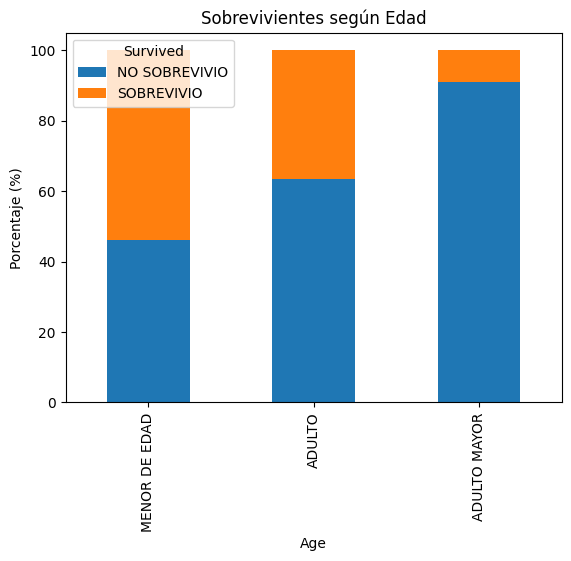

In [ ]:
# Orden de las categorías
order = ["MENOR DE EDAD", "ADULTO", "ADULTO MAYOR"]

# Crear tabla de contingencia de frecuencias relativas en porcentajes
ct = pd.crosstab(index=df_short_trat_cat['Age'], columns=df_short_trat_cat['Survived'])
ct_percentage = (ct.T / ct.sum(axis=1)).T * 100

# Ordenar las categorías según el orden deseado
ct_percentage = ct_percentage.reindex(order)

# Gráfico de barras
plot = ct_percentage.plot(kind='bar', stacked=True)
plt.title('Sobrevivientes según Edad')
plt.ylabel('Porcentaje (%)')
plt.show()

La distribución cambia, quiere decir que EDAD sí afecta a la probabilidad que una persona sobreviva.

Se puede observar una concentración más alta de jóvenes (menos de 10 años aproximadamente) entre los sobrevivientes, lo que indica que los niños tenían más posibilidades de ser rescatados

### SURVIDED - SIBSP

In [ ]:
df_short_trat[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).agg(['count','sum','mean']).sort_values(by=('Survived', 'mean'), ascending=False)

Survived               
         count  sum      mean
SibSp                        
1          209  112  0.535885
2           28   13  0.464286
0          608  210  0.345395
3           16    4  0.250000
4           18    3  0.166667
5            5    0  0.000000
8            7    0  0.000000

In [ ]:
# Tabla de contingencia sibsp / survived
table_Cont_Surv_Sibsp=pd.crosstab(index=df_short_trat_cat['Survived'],
                                  columns=df_short_trat_cat['SibSp'], margins=True)
table_Cont_Surv_Sibsp.head()

SibSp,CON FAMILIAR,SIN FAMILIAR,All
Survived,,,
NO SOBREVIVIO,151,398,549
SOBREVIVIO,132,210,342
All,283,608,891


In [ ]:
# PROBABILIDADES
# Proporción de pasajeros
proportion_survived = table_Cont_Surv_Sibsp.loc['SOBREVIVIO'] / table_Cont_Surv_Sibsp.loc['All']

# Mostrando solo las proporciones de las clases (excluyendo el total global 'All')
proportion_survived = proportion_survived.drop('All')
proportion_survived

SibSp
CON FAMILIAR    0.466431
SIN FAMILIAR    0.345395
dtype: float64

In [ ]:
# tabla de contingencia en porcentajes relativos total
pd.crosstab(index=df_short_trat_cat['Survived'], columns=df_short_trat_cat['SibSp'],
            margins=True).apply(lambda r: r/len(df_short_trat_cat) *100,
                                axis=1)

SibSp,CON FAMILIAR,SIN FAMILIAR,All
Survived,,,
NO SOBREVIVIO,16.947250,44.668911,61.616162
SOBREVIVIO,14.814815,23.569024,38.383838
All,31.762065,68.237935,100.000000


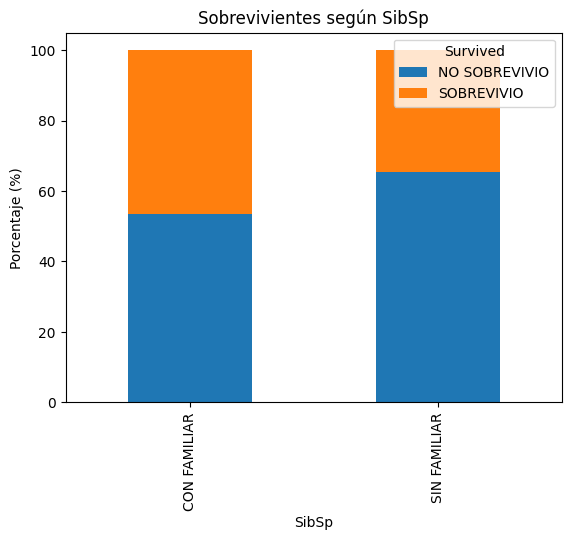

In [ ]:
# Orden de las categorías
order = ["CON FAMILIAR", "SIN FAMILIAR"]

# Crear tabla de contingencia de frecuencias relativas en porcentajes
ct = pd.crosstab(index=df_short_trat_cat['SibSp'], columns=df_short_trat_cat['Survived'])
ct_percentage = (ct.T / ct.sum(axis=1)).T * 100

# Ordenar las categorías según el orden deseado
ct_percentage = ct_percentage.reindex(order)

# Gráfico de barras
plot = ct_percentage.plot(kind='bar', stacked=True)
plt.title('Sobrevivientes según SibSp')
plt.ylabel('Porcentaje (%)')
plt.show()

La distribución cambia, quiere decir que SIPSP sí afecta a la probabilidad que una persona sobreviva.

La mayoría de los pasajeros que no tenían hermanos o cónyuges(CON FAMILIAR) abordo no sobrevivieron.

### SURVIDED - EMBARKED

In [ ]:
df_short_trat[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).agg(['count','sum','mean']).sort_values(by=('Survived', 'mean'), ascending=False)

Survived               
            count  sum      mean
Embarked                        
C             168   93  0.553571
Q              77   30  0.389610
S             646  219  0.339009

In [ ]:
# Tabla de contingencia embarked / survived
table_Cont_Surv_Embar=pd.crosstab(index=df_short_trat_cat['Survived'],
                                    columns=df_short_trat_cat['Embarked'], margins=True)
table_Cont_Surv_Embar.head()

Embarked,CHERBOURG,QUEENSTOWN,SOUTHAMPTON,All
Survived,,,,
NO SOBREVIVIO,75,47,427,549
SOBREVIVIO,93,30,219,342
All,168,77,646,891


In [ ]:
# PROBABILIDADES
# Proporción de pasajeros
proportion_survived = table_Cont_Surv_Embar.loc['SOBREVIVIO'] / table_Cont_Surv_Embar.loc['All']

# Mostrando solo las proporciones de las clases (excluyendo el total global 'All')
proportion_survived = proportion_survived.drop('All')
proportion_survived

Embarked
CHERBOURG      0.553571
QUEENSTOWN     0.389610
SOUTHAMPTON    0.339009
dtype: float64

In [ ]:
# tabla de contingencia en porcentajes relativos total
pd.crosstab(index=df_short_trat_cat['Survived'], columns=df_short_trat_cat['Embarked'],
            margins=True).apply(lambda r: r/len(df_short_trat_cat) *100,
                                axis=1)

Embarked,CHERBOURG,QUEENSTOWN,SOUTHAMPTON,All
Survived,,,,
NO SOBREVIVIO,8.417508,5.274972,47.923681,61.616162
SOBREVIVIO,10.437710,3.367003,24.579125,38.383838
All,18.855219,8.641975,72.502806,100.000000


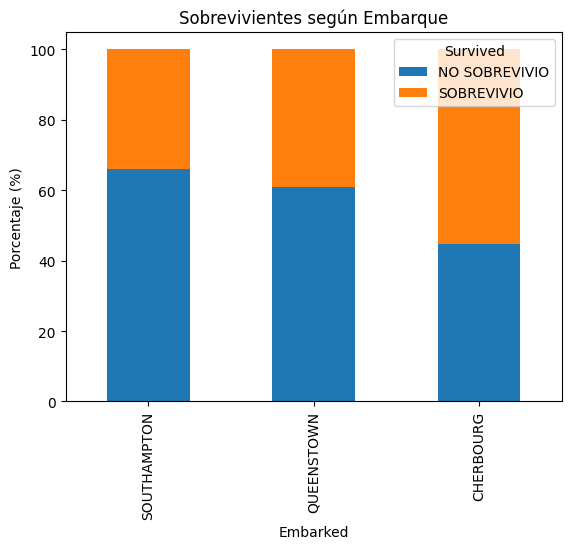

In [ ]:
# Orden de las categorías
order = ["SOUTHAMPTON", "QUEENSTOWN","CHERBOURG"]

# Crear tabla de contingencia de frecuencias relativas en porcentajes
ct = pd.crosstab(index=df_short_trat_cat['Embarked'], columns=df_short_trat_cat['Survived'])
ct_percentage = (ct.T / ct.sum(axis=1)).T * 100

# Ordenar las categorías según el orden deseado
ct_percentage = ct_percentage.reindex(order)

# Gráfico de barras
plot = ct_percentage.plot(kind='bar', stacked=True)
plt.title('Sobrevivientes según Embarque')
plt.ylabel('Porcentaje (%)')
plt.show()

La distribución cambia, quiere decir que EMBARQUE sí afecta a la probabilidad que una persona sobreviva.

La distribución de puntos sugiere que los pasajeros que embarcaron en el puerto CHERBOURG tuvieron la menor tasa de supervivencia en comparación con los otros dos puertos. Aunque esto podría estar relacionado con otros factores, como la clase del pasaje o la tarifa pagada.

### SURVIVED - FARE

In [ ]:
# Tabla de contingencia fare / survived
table_Cont_Surv_Fare=pd.crosstab(index=df_short_trat_cat['Survived'],
                                    columns=df_short_trat_cat['Fare'], margins=True)
table_Cont_Surv_Fare.head()

Fare,BAJA,MEDIA,ALTA,All
Survived,,,,
NO SOBREVIVIO,498,37,14,549
SOBREVIVIO,233,70,39,342
All,731,107,53,891


In [ ]:
# PROBABILIDADES
# Proporción de pasajeros
proportion_survived = table_Cont_Surv_Fare.loc['SOBREVIVIO'] / table_Cont_Surv_Fare.loc['All']

# Mostrando solo las proporciones de las clases (excluyendo el total global 'All')
proportion_survived = proportion_survived.drop('All')
proportion_survived

Fare
BAJA     0.318741
MEDIA    0.654206
ALTA     0.735849
dtype: float64

In [ ]:
# tabla de contingencia en porcentajes relativos total
pd.crosstab(index=df_short_trat_cat['Survived'], columns=df_short_trat_cat['Fare'],
            margins=True).apply(lambda r: r/len(df_short_trat_cat) *100,
                                axis=1)

Fare,BAJA,MEDIA,ALTA,All
Survived,,,,
NO SOBREVIVIO,55.892256,4.152637,1.571268,61.616162
SOBREVIVIO,26.150393,7.856341,4.377104,38.383838
All,82.042649,12.008979,5.948373,100.000000


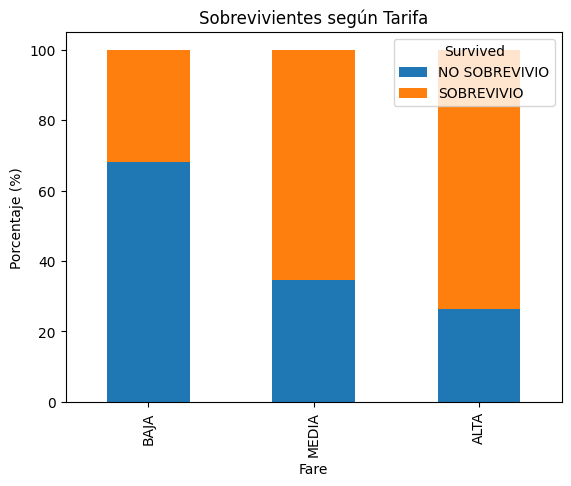

In [ ]:
# Orden de las categorías
order = ["BAJA", "MEDIA","ALTA"]

# Crear tabla de contingencia de frecuencias relativas en porcentajes
ct = pd.crosstab(index=df_short_trat_cat['Fare'], columns=df_short_trat_cat['Survived'])
ct_percentage = (ct.T / ct.sum(axis=1)).T * 100

# Ordenar las categorías según el orden deseado
ct_percentage = ct_percentage.reindex(order)

# Gráfico de barras
plot = ct_percentage.plot(kind='bar', stacked=True)
plt.title('Sobrevivientes según Tarifa')
plt.ylabel('Porcentaje (%)')
plt.show()

La distribución cambia, quiere decir que TARIFAS sí afecta a la probabilidad que una persona sobreviva.

Se puede observar que aquellos que pagaron tarifas más altas tuvieron una mayor tasa de supervivencia. Esto se correlaciona con la observación sobre Pclass, ya que los pasajeros de la 1° clase suelen pagar tarifas más altas

### SURVIVED - PARCH

In [ ]:
# Tabla de contingencia fare / survived
table_Cont_Surv_Parch=pd.crosstab(index=df_short_trat_cat['Survived'],
                                    columns=df_short_trat_cat['Parch'], margins=True)
table_Cont_Surv_Parch.head()

Parch,CON FAMILIAR,SIN FAMILIAR,All
Survived,,,
NO SOBREVIVIO,104,445,549
SOBREVIVIO,109,233,342
All,213,678,891


In [ ]:
# PROBABILIDADES
# Proporción de pasajeros
proportion_survived = table_Cont_Surv_Parch.loc['SOBREVIVIO'] / table_Cont_Surv_Parch.loc['All']

# Mostrando solo las proporciones de las clases (excluyendo el total global 'All')
proportion_survived = proportion_survived.drop('All')
proportion_survived

Parch
CON FAMILIAR    0.511737
SIN FAMILIAR    0.343658
dtype: float64

In [ ]:
# tabla de contingencia en porcentajes relativos total
pd.crosstab(index=df_short_trat_cat['Survived'], columns=df_short_trat_cat['Parch'],
            margins=True).apply(lambda r: r/len(df_short_trat_cat) *100,
                                axis=1)

Parch,CON FAMILIAR,SIN FAMILIAR,All
Survived,,,
NO SOBREVIVIO,11.672278,49.943883,61.616162
SOBREVIVIO,12.233446,26.150393,38.383838
All,23.905724,76.094276,100.000000


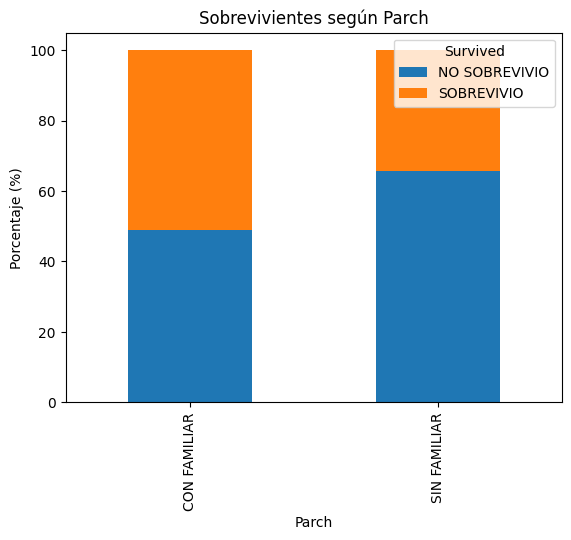

In [ ]:
# Orden de las categorías
order = ["CON FAMILIAR", "SIN FAMILIAR"]

# Crear tabla de contingencia de frecuencias relativas en porcentajes
ct = pd.crosstab(index=df_short_trat_cat['Parch'], columns=df_short_trat_cat['Survived'])
ct_percentage = (ct.T / ct.sum(axis=1)).T * 100

# Ordenar las categorías según el orden deseado
ct_percentage = ct_percentage.reindex(order)

# Gráfico de barras
plot = ct_percentage.plot(kind='bar', stacked=True)
plt.title('Sobrevivientes según Parch')
plt.ylabel('Porcentaje (%)')
plt.show()

La distribución cambia, quiere decir que PARCH sí afecta a la probabilidad que una persona sobreviva.

Al igual que con SibSp, la mayoría de los pasajeros que viajaban solos (sin padres o hijos) tuvieron una tasa de supervivencia más baja. Sin embargo, aquellos con 1 o 2 familiares directos (padres o hijos) parecen tener una tasa de supervivencia ligeramente mejor

# INDEPENDENCIA

In [ ]:
from scipy.stats import chi2_contingency

def test_chi2(table, alpha=0.05):
    # Calculando el p-value usando chi2_contingency
    p_value = chi2_contingency(table)[1]

    # Comparando el p-value con alpha
    if p_value < alpha:
        result = f"p-value: {p_value:.4f} - Rechazar H0, entonces las variables están relacionadas."
    else:
        result = f"p-value: {p_value:.4f} - No rechazar H0, entonces las variables son independientes."

    return result

In [ ]:
result = test_chi2(table_Cont_Surv_pclass)
print(result)

p-value: 0.0000 - Rechazar H0, entonces las variables están relacionadas.


In [ ]:
result = test_chi2(table_Cont_Surv_Sex)
print(result)

p-value: 0.0000 - Rechazar H0, entonces las variables están relacionadas.


In [ ]:
result = test_chi2(table_Cont_Surv_Age)
print(result)

p-value: 0.0102 - Rechazar H0, entonces las variables están relacionadas.


In [ ]:
result = test_chi2(table_Cont_Surv_Sibsp)
print(result)

p-value: 0.0176 - Rechazar H0, entonces las variables están relacionadas.


In [ ]:
result = test_chi2(table_Cont_Surv_Embar)
print(result)

p-value: 0.0002 - Rechazar H0, entonces las variables están relacionadas.


In [ ]:
result = test_chi2(table_Cont_Surv_Fare)
print(result)

p-value: 0.0000 - Rechazar H0, entonces las variables están relacionadas.


Con los estadístico se demuestra numéricamente que las distribuciones cambian, quiere decir sí afecta a la probabilidad que una persona sobreviva.